Examen 1 --> Modelación de Sistemas Físicos 

19/09/24

Hannia Isela Dominguez Nuñez

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import control as ctrl
from scipy.integrate import odeint 

In [33]:
#parametros del sistema 
A1=0.2
A2=0.5
K1=0.0032
K2=0.0036
g=9.81
q=0.01

#CI
y0 = [0, 0, 0]
ts= np.linspace(0, 15, 1000)


In [40]:
#funcion del systema 

def sys(y,ts,A1,A2,K1,K2,g,q):
    h1,h2=y
    
    dhdt=[((q/A1)-(K1/A1)*((g*h1)**0.5)),
          ((K1/A2)*((g*h1)**0.5)-(K2/A2)*((g*h2)**0.5))
    ]
    
    return dhdt

In [41]:
#resolvemos el systema 
def sol(y0,ts,A1,A2,K1,K2,g,q):
    sol=odeint(sys,y0,ts,args=(A1,A2,K1,K2,g,q))
    
    h1 = sol[:, 0]
    h2 = sol[:, 1]
    
    xpp =(K1/A2)*((g*h1)**0.5)-(K2/A2)*((g*h2)**0.5)
    
    s = ts[1] - ts[0] # de acuerdo con el teorema de la derivada necesitamos un cambio o paso "h" que va a ser este 
    
    xpp_num = np.diff(np.diff(h1)/s)/s
    
    return sol, xpp, xpp_num 

In [42]:
#para obtener eigenvalues a partir de los puntos de equilibrio 
h1=(q/K1)**2/g
h2=(K1/K2)**2*h1

A = np.array([[-(K1/2*A1)*(g/h1)**0.5, 0],
             [(K1/2*A2)*(g/h1)**0.5,-(K2/2*A2)*(g/h2)**0.5]
             ])

B = np.array([[1/A1],
              [0]])

C = np.array([0,1])


eig=np.linalg.eigvals(A)
print(eig)


[-0.00317844 -0.00100454]


<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   -8.674e-19 s + 0.01256
----------------------------
s^2 + 0.004183 s + 3.193e-06

[-0.00317844+0.j -0.00100454+0.j]


/Users/hanniadominguez/Desktop/Modelado1/.venv/lib/python3.12/site-packages/scipy/signal/_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


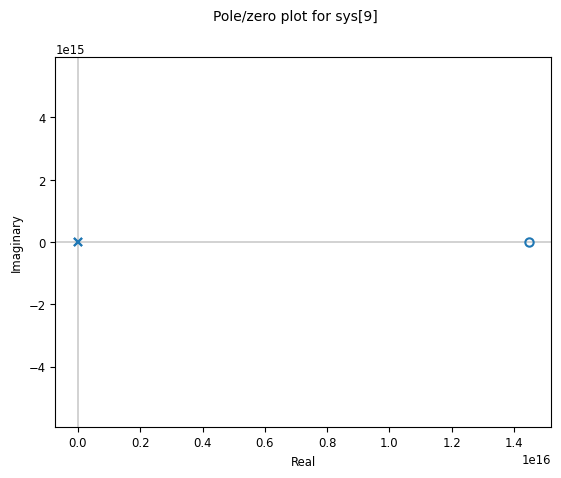

In [43]:
#obtenemos la funcion de transferencia
#debemos pasar el sistema tipo SS a TF, usanto ctrl 
sysSS=ctrl.ss(A,B,C,0)

sysTF=ctrl.ss2tf(sysSS)
print(sysTF)

#obtenemos el mapa de polos y zeros 
print(ctrl.poles(sysTF))
ctrl.pzmap(sysTF)

/Users/hanniadominguez/Desktop/Modelado1/.venv/lib/python3.12/site-packages/scipy/signal/_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


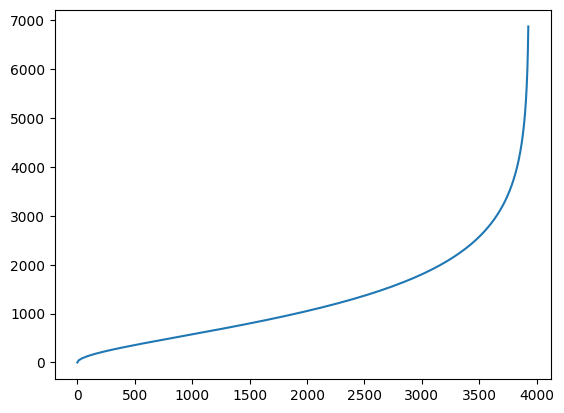

In [44]:
#respuesta ante una entrada tipo escalon
ysr, t = ctrl.step_response(sysTF)
plt.plot(t,ysr) 

ValueError: x and y must have same first dimension, but have shapes (1000,) and (3,)

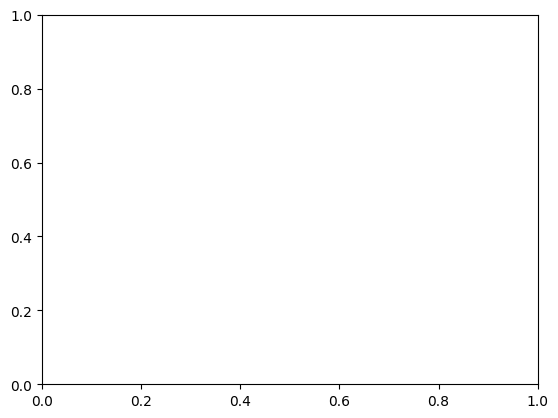

In [60]:
#retratos fase

y = [0,0,0]
yt = lambda y,ts,A1,A2,K1,K2,g,q : sys(y,ts,A1,A2,K1,K2,g,q)

plt.plot(t, y)
plt.plot(t, yt(y,ts,A1,A2,K1,K2,g,q), '--')
plt.figure()